In [1]:
import matplotlib
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

## Notation:
    
    - .function_name : denotes that the table name goes before the dot and the name of the function after.
    (e.g.  .select([column labels]) = twitter_data.select(['id','date'])
    
    - () : denotes that the function takes no arguments and is called on the table object named before the function.
    (e.g. twitter_data.num_rows() gives you the number of rows for twitter_data)
    
    - [] : denotes that whats inside the [] should be an array of elements 
    (e.g.   [places] = [first, second, third])
    
    - {T/F} : denotes that either a True or False boolean can replace the {T/F} 
    (e.g.  (descending = {T/F}) = (descending = True))
    
    - {fn} : denotes what you could replace with a function (usually specific to table)
    (e.g. collect = {fn} could be collect = np.mean or even a function you create)
    
    - {val} : denotes what you could replace with a value (string, float, int, variable) 
    (e.g. zero = {val} could be zero = 'nan')
    
### For more resources:
http://data8.org/data8assets/exam/data8_sp16_midterm_study_guide.pdf

http://data8.org/data8assets/exam/data8_sp16_final_study_guide.pdf

# Importing a table

### This is where you start a data analysis, by finding, cleaning and importing your data

- Table.read_table(file link): Creates table from a data file (.csv,.txt) in the same jupyter folder as active notebook, or from a URL. Either way, arguments can be added to the call for more complex data formats.

For this it is essential to know what you are importing, so in this case, I refer to the documentation and see this:
0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

1 - the id of the tweet (2087)

2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)

3 - the query (lyx). If there is no query, then this value is NO_QUERY.

4 - the user that tweeted (robotickilldozr)

5 - the text of the tweet (Lyx is cool)

http://help.sentiment140.com/for-students/
http://www.cs.columbia.edu/~julia/papers/Agarwaletal11.pdf


In [2]:
Table.read_table('testdata.manual.2009.06.14.csv') #must be stored in same jupyter folder as active notebook

0,1,2,3,4,5
4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...
4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.
4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!"
4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...
4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I thi ...
4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...
0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given a ...
4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes about himself.


In [3]:
twitter_data = Table.read_table('testdata.manual.2009.06.14.csv') #to save the new table, name it

- When loading a URL, also put it in quotes. The only thing to look for is make sure the link is a .txt or .csv file

In [4]:
NOAA_data = Table.read_table('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', comment = "#", 
                                 na_values = [-99.99, -1], delim_whitespace = True,
                   names = ["year", "month", "decimal_date", "average", "interpolated", "trend", "days"])
NOAA_data

year,month,decimal_date,average,interpolated,trend,days
1958,3,1958.21,315.71,315.71,314.62,nan
1958,4,1958.29,317.45,317.45,315.29,nan
1958,5,1958.38,317.5,317.5,314.71,nan
1958,6,1958.46,nan,317.1,314.85,nan
1958,7,1958.54,315.86,315.86,314.98,nan
1958,8,1958.62,314.93,314.93,315.94,nan
1958,9,1958.71,313.2,313.2,315.91,nan
1958,10,1958.79,nan,312.66,315.61,nan
1958,11,1958.88,313.33,313.33,315.31,nan
1958,12,1958.96,314.67,314.67,315.61,nan


- As you can see, the call above not only called the table but also included other more complex calls to specifically format the table. This is rarely used in the main class but may be explored in the connectors. More info for what arguments to use can be found at http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

# Accessing Values
### This gives you information from the table about values or the table as a whole
Try uncommenting different different statements to view their multiple outputs

#### These methods access values
- Table_name[index or label] : Returns the column values under the column at that index or label. Remember indexes start at 0, and labels must be strings.


- .labels() : Returns a tuple of the labels in order.


- .row(index) // .column(index or label) : Returns an array of the row or column specified by the indexing/labels.


- .column_index(label) : Returns the index of a column. 


#### These methods give you information about the table
- .num_rows() // .num_columns() : Returns the number of rows/columns in the table


- .rows() // .columns() : Returns an array with elements corresponding to the sequential elements of each row/column

In [5]:
NOAA_data['average']                             #both the 'query' column
#NOAA_data_url[3]
print(NOAA_data.column_index('average'))         #returns 3
NOAA_data['average'] is NOAA_data[3]         #each method refers to the same column so they are the same

3


True

In [6]:
NOAA_data.column('average')                      #same exact results as above, just different ways to access column values
#NOAA_data_url.column(3)
print(NOAA_data.column_index('average'))               
NOAA_data.column('average')  is NOAA_data.column(3)

3


True

In [7]:
twitter_data.rows 
twitter_data.row(5)     #shows what data is contained in row #5, the tweet by GeorgeVHulme
#twitter_data.row(600)  #index must be in range of table row nums

Row(0=4, 1=8, 2='Mon May 11 03:22:00 UTC 2009', 3='kindle2', 4='GeorgeVHulme', 5="@richardebaker no. it is too big. I'm quite happy with the Kindle2.")

In [8]:
twitter_data.columns    #shows what data are contained in column 5, labeled 'text'
twitter_data.column(5)

array([ '@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.',
       'Reading my kindle2...  Love it... Lee childs is good read.',
       'Ok, first assesment of the #kindle2 ...it fucking rocks!!!',
       "@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)",
       "@mikefish  Fair enough. But i have the Kindle2 and I think it's perfect  :)",
       "@richardebaker no. it is too big. I'm quite happy with the Kindle2.",
       'Fuck this economy. I hate aig and their non loan given asses.',
       'Jquery is my new best friend.', 'Loves twitter',
       'how can you not love Obama? he makes jokes about himself.',
       "Check this video out -- President Obama at the White House Correspondents' Dinner http://bit.ly/IMXUM",
       "@Karoli I firmly believe that Obama/Pelosi have ZERO desire to be civil.  It's a charade and a slogan, but 

# Modifying a Table

### Once you have a table to work with, this is your toolkit for adding, removing or changing values

#### These methods do not modify the table, but just return a new instance

- .relabeled( [list of old labels] , [list of new labels] ) : Returns a table with column label(s) changed from old labels to new labels.


- .with_column( label , [values] ) // .with_columns( [series of ( label , [values] )] ) : Returns a table with column(s) with the specified values. The values must be the same length as the tables number of rows. If the label is already a label in the table, the values in that column will be replaced with the new values called on. 


- .with_row( [values] ) // .with_rows( [lists of values] ) : Returns a table with the values added to the bottom of the table in order. The values must be in the same order and format as the column labels. 


- .drop( label or [labels] ) :  Returns a table without the label(s) specified.


- .take( row_num or [row_nums] ) // .exclude( row_num or [row_nums] ) : Returns a table with only row numbers or without specified numbers accordingly, but each with all columns.


- .select( label or [labels] ) : Returns a table with only column labels, but with all rows.


#### These methods modify the original table

- .relabel( old_label, new_label ) : Changes a single label from old_label to new_label in the table.


- .move_to_start(label) // .move_to_end(label) : Move a column to the first or last spots in order.


- .append(row_or_table) // .append_column(label, values) : Appends a row or entire table to the bottom of the table. Appends a column to the far right of the table or replaces a column if label is already in the table.

In [9]:
twitter_data = twitter_data.relabeled(['0','1','2','3','4','5'], ['polarity','id','date','query','user','text']) 
#labels are always strings

In [10]:
twitter_data = twitter_data.with_column('source', 'GitHub')
twitter_data
#Since only one value was input, every row will assume that value for the new column

polarity,id,date,query,user,text,source
4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...,GitHub
4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.,GitHub
4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!",GitHub
4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...,GitHub
4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I thi ...,GitHub
4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...,GitHub
0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given a ...,GitHub
4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.,GitHub
4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter,GitHub
4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes about himself.,GitHub


In [11]:
twitter_data = twitter_data.with_columns([['source', 'twitter'], ['row_num', np.arange(498)]])
twitter_data
#Note how every value in 'source' was changed and how you can also add unique values in the form of an array.

polarity,id,date,query,user,text,source,row_num
4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...,twitter,0
4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.,twitter,1
4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!",twitter,2
4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...,twitter,3
4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I thi ...,twitter,4
4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...,twitter,5
0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given a ...,twitter,6
4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.,twitter,7
4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter,twitter,8
4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes about himself.,twitter,9


In [12]:
twitter_data.with_rows([
    [2,0,'Tue Jun 7 12:02:35 UTC 2016', 'data8', 'deneros_dog', 'Cant wait to start my first project', 'Twitter', 499],
    [0,0,'Tue Jun 7 12:03:45 UTC 2016', 'data100', 'deneros_dog', 'Will we learn Apache Spark?', 'GitHub', 500]])

#Note how each array was formatted to match the previous data types identically

polarity,id,date,query,user,text,source,row_num
4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...,twitter,0
4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.,twitter,1
4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!",twitter,2
4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...,twitter,3
4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I thi ...,twitter,4
4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...,twitter,5
0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given a ...,twitter,6
4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.,twitter,7
4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter,twitter,8
4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes about himself.,twitter,9


In [13]:
twitter_data.drop(['source', 'id']) #without 'source' or 'id'
#twitter_data.drop('row_num') without row_num

polarity,date,query,user,text,row_num
4,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...,0
4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.,1
4,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!",2
4,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...,3
4,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I thi ...,4
4,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...,5
0,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given a ...,6
4,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.,7
4,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter,8
4,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes about himself.,9


In [14]:
odd_rows = twitter_data.take(np.arange(1,499,2)) #only only odd-numbered rows
even_rows = twitter_data.exclude(np.arange(1,499,2)) #everything but odd-numbered rows 

In [15]:
odd_rows.append(even_rows)  #all the even numbers are now on the bottom of the table

polarity,id,date,query,user,text,source,row_num
4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.,twitter,1
4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...,twitter,3
4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...,twitter,5
4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.,twitter,7
4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes about himself.,twitter,9
0,14,Mon May 11 03:32:48 UTC 2009,obama,kylesellers,@Karoli I firmly believe that Obama/Pelosi have ZERO des ...,twitter,11
4,16,Mon May 11 05:05:58 UTC 2009,nike,MumsFP,Watchin Espn..Jus seen this new Nike Commerical with a P ...,twitter,13
4,18,Mon May 11 05:20:15 UTC 2009,lebron,cameronwylie,"#lebron best athlete of our generation, if not all time ...",twitter,15
4,20,Mon May 11 05:21:04 UTC 2009,lebron,mtgillikin,i love lebron. http://bit.ly/PdHur,twitter,17
4,22,Mon May 11 05:21:45 UTC 2009,lebron,Native_01,@Pmillzz lebron IS THE BOSS,twitter,19


In [16]:
odd_rows.append_column('source', 'odd_twitter') 
#notice, the table is not returned, but only mutated with the above call that replaced the column

In [17]:
twitter_data.select(['query', 'polarity', 'text'])

query,polarity,text
kindle2,4,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...
kindle2,4,Reading my kindle2... Love it... Lee childs is good read.
kindle2,4,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!"
kindle2,4,@kenburbary You'll love your Kindle2. I've had mine for ...
kindle2,4,@mikefish Fair enough. But i have the Kindle2 and I thi ...
kindle2,4,@richardebaker no. it is too big. I'm quite happy with t ...
aig,0,Fuck this economy. I hate aig and their non loan given a ...
jquery,4,Jquery is my new best friend.
twitter,4,Loves twitter
obama,4,how can you not love Obama? he makes jokes about himself.


In [18]:
twitter_data.move_to_start('row_num')
#Uncomment and delete this message to see that the twitter_data table object has changed
#twitter_data

row_num,polarity,id,date,query,user,text,source
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...,twitter
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.,twitter
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!",twitter
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...,twitter
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I thi ...,twitter
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...,twitter
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non loan given a ...,twitter
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.,twitter
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter,twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes about himself.,twitter


In [19]:
twitter_data.move_to_end('date')

row_num,polarity,id,query,user,text,source,date
0,4,3,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...,twitter,Mon May 11 03:17:40 UTC 2009
1,4,4,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.,twitter,Mon May 11 03:18:03 UTC 2009
2,4,5,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!",twitter,Mon May 11 03:18:54 UTC 2009
3,4,6,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had mine for ...,twitter,Mon May 11 03:19:04 UTC 2009
4,4,7,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2 and I thi ...,twitter,Mon May 11 03:21:41 UTC 2009
5,4,8,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite happy with t ...,twitter,Mon May 11 03:22:00 UTC 2009
6,0,9,aig,Seth937,Fuck this economy. I hate aig and their non loan given a ...,twitter,Mon May 11 03:22:30 UTC 2009
7,4,10,jquery,dcostalis,Jquery is my new best friend.,twitter,Mon May 11 03:26:10 UTC 2009
8,4,11,twitter,PJ_King,Loves twitter,twitter,Mon May 11 03:27:15 UTC 2009
9,4,12,obama,mandanicole,how can you not love Obama? he makes jokes about himself.,twitter,Mon May 11 03:29:20 UTC 2009


# Useful Functions

### This explores many of the functions used on tables and provides examples of their use

## Mutation

#### It is important to note that certain functions have optional arguments, such that you only need to call it on 1 or 2 variables, rather than all 5. You can distinguish between these because unnecessary variables have an = sign after them (i.e. collect = {fn})

- .sort(column_label, decreasing = {T/F}, distinct = {T/F} : Sorts values in a column according to value in the specified column, either increasing or decreasing. distinct = True removes repeated values.


- .group(column_label, collect = {fn}) : Groups values in the table based on unique values in that column_label. Then, because values are usually aggregated in the other columns, the collect = {fn} sets a function that will run on that array and can return a single value or other function output.


- .groups([column_labels], collect = {fn}) : Groups values in the table based on unique values in the column label pairs/trios...


- .pivot(column_label, row or [rows], values = column_label or [labels], collect = {fn}, zero = {val}) : Makes a table with a column for each unique value from column_label. The table rows are made of unique values in row or [rows] and the bulk of the table is the counts of each occurrence of a value in both of those categories. values could also be set to a column instead of counts, but to do so, you need a collect function and zero processor.


- .stack(key, labels = [column_labels]) : Makes a 2 or 3-column table with the first column as each value in that table. The next columns are all data associated with that value. If labels are specified then the data associated with that value are just the ones specified.


- .join(column_label, other_table, other_column_label) : Generates a table with columns in self and other_table, with rows for all values of a column that appear in both tables. If a join value appears elsewhere in the original (self) table, both instances appear in the joined table, but if values are repeated in the other_table, only the first is joined.

In [20]:
twitter_data.sort('polarity', descending = True, distinct = False) 
#twitter_data.sort('polarity', descending = True, distinct = True)  #uncomment this to see when distinct = True

row_num,polarity,id,query,user,text,source,date
495,4,14074,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environment. I < ...,twitter,Sun Jun 14 04:36:34 UTC 2009
492,4,14071,latex,yomcat,"After using LaTeX a lot, any other typeset mathematics j ...",twitter,Sun Jun 14 04:31:28 UTC 2009
491,4,14070,latex,roguemovement,using Linux and loving it - so much nicer than windows.. ...,twitter,Sun Jun 14 04:31:23 UTC 2009
489,4,14050,Bobby Flay,A_TALL_BLONDE,i lam so in love with Bobby Flay... he is my favorite. R ...,twitter,Sat Jun 13 16:24:15 UTC 2009
487,4,14046,Bobby Flay,JimFacey,getting ready to test out some burger receipes this week ...,twitter,Sat Jun 13 16:23:41 UTC 2009
479,4,13055,Bobby Flay,LAURAcBRYAN,"My dad was in NY for a day, we ate at MESA grill last ni ...",twitter,Sat Jun 13 16:24:34 UTC 2009
478,4,13054,Bobby Flay,annieblane,can't wait for the great american food and music festiva ...,twitter,Sat Jun 13 16:24:25 UTC 2009
477,4,13053,Bobby Flay,ZFilth,Gonna go see Bobby Flay 2moro at Shoreline. Eat and drin ...,twitter,Sat Jun 13 16:24:12 UTC 2009
476,4,13052,Bobby Flay,tessalau,Excited about seeing Bobby Flay and Guy Fieri tomorrow a ...,twitter,Sat Jun 13 16:24:08 UTC 2009
471,4,7015,google,popitlockit,I have a google addiction. Thank you for pointing that o ...,twitter,Wed Jun 10 05:24:40 UTC 2009


In [21]:
twitter_data.group('polarity')   #when no collect function is specified, the counts are returned

polarity,count
0,177
2,139
4,182


In [22]:
twitter_data.group('polarity', collect = np.mean)  
#most functions operate best on numerical values, and return nothing if operating on strings

polarity,row_num mean,id mean,query mean,user mean,text mean,source mean,date mean
0,247.938,1872.81,,,,,
2,272.439,1848.27,,,,,
4,230.764,1876.27,,,,,


In [23]:
twitter_data.group('user').sort('count', descending = True) 
# Since most methods return a mutated instance of the original table, you can often use multiple methods in 
# a single statement to return more complex or specific results.
# This shows that some users posted 2-3 tweets because it grouped the table by username counting the number of tweets 
# associated with that user, then, the table is sorted so that the highest counts are at the top.

user,count
vmkobs,3
tradecruz,2
souleaterjh,2
mobileadgirl,2
cfbloggers,2
SimpleManJess,2
MamiYessi,2
zedomax,1
zed01,1
yowneh,1


In [24]:
## Simple Pivot Table

twitter_data.pivot('polarity', 'user')
#each polarity value represents a column_label and each user that ever had a tweet with a polarity is the row and 
#the values in the table show that each user had one tweet per polarity since most users only posted one tweet

user,0,2,4
5x1llz,0,1,0
A_TALL_BLONDE,0,0,1
AddictedToFresh,0,1,0
AdiOpERsOcoM,0,1,0
Adrigonzo,1,0,0
AirDye,0,1,0
Alexi_G,0,0,1
Alfred04654,0,0,1
Annimallover,0,1,0
Ant_Ward,0,0,1


In [25]:
## Slightly more complex pivot table

NOAA_data.pivot('month','year', values = 'average', collect = np.mean, zero = 0)

#each unique month is the column_labels, and each year marks the rows so its easier to see trends among months or years
#the values show what was in the original table where that year and month's measurement coincided with an average value

year,1,2,3,4,5,6,7,8,9,10,11,12
1958,0,0,315.71,317.45,317.5,nan,315.86,314.93,313.2,nan,313.33,314.67
1959,315.62,316.38,316.71,317.72,318.29,318.15,316.54,314.8,313.84,313.26,314.8,315.58
1960,316.43,316.97,317.58,319.02,320.03,319.59,318.18,315.91,314.16,313.83,315,316.19
1961,316.93,317.7,318.54,319.48,320.58,319.77,318.57,316.79,314.8,315.38,316.1,317.01
1962,317.94,318.56,319.68,320.63,321.01,320.55,319.58,317.4,316.26,315.42,316.69,317.69
1963,318.74,319.08,319.86,321.39,322.25,321.47,319.74,317.77,316.21,315.99,317.12,318.31
1964,319.57,nan,nan,nan,322.25,321.89,320.44,318.7,316.7,316.79,317.79,318.71
1965,319.44,320.44,320.89,322.13,322.16,321.87,321.39,318.81,317.81,317.3,318.87,319.42
1966,320.62,321.59,322.39,323.87,324.01,323.75,322.39,320.37,318.64,318.1,319.79,321.08
1967,322.07,322.5,323.04,324.42,325,324.09,322.55,320.92,319.31,319.31,320.72,321.96


In [26]:
twitter_data.stack('polarity')

polarity,column,value
4,row_num,0
4,id,3
4,query,kindle2
4,user,tpryan
4,text,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...
4,source,twitter
4,date,Mon May 11 03:17:40 UTC 2009
4,row_num,1
4,id,4
4,query,kindle2


In [27]:
twitter_data.stack('polarity', labels = 'text')

polarity,column,value
4,text,@stellargirl I loooooooovvvvvveee my Kindle2. Not that t ...
4,text,Reading my kindle2... Love it... Lee childs is good read.
4,text,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!"
4,text,@kenburbary You'll love your Kindle2. I've had mine for ...
4,text,@mikefish Fair enough. But i have the Kindle2 and I thi ...
4,text,@richardebaker no. it is too big. I'm quite happy with t ...
0,text,Fuck this economy. I hate aig and their non loan given a ...
4,text,Jquery is my new best friend.
4,text,Loves twitter
4,text,how can you not love Obama? he makes jokes about himself.


# Statistics

### These functions help you compute relationships between values in a table.

- .stats(ops = [operations]) : Computes statistics based on the operations included for each column and puts them in a table. This doesn't work well with non-numerical values. 
    Some useful operations include: min, max, range, np.mean, np.median, np.std, np.var


- .percentile(value) : for each array of values in a column, it computes the value that is at that percentile value.


- .sample(k = int, with_replacement = {T/F}, weights = {array} : Returns a new table with k rows sampled randomly. If with_replacement, sampling a value does NOT remove it from the table, so it can be sampled multiple times in the resulting table. Weights must be the same length as the num_rows of the table and must sum to 1 so it can give values a corresponding weight/probability. 


- .split(k = int) : Returns two tables, one with k rows of sampled values, and the other with other rows of the original table.


- .bin(select = column_label or [labels], bins = int or [numbers], range = (lower_bound, upper_bound), density = {T/F}) : Creates bins for each interval specified in the range, if just an int is given for bins, then it evenly divides that many bids. Then for each column specified (all columns, if none specifically are selected), for each value in the range of a bin increases that bin count by 1. Density then normalizes the counts to be relative probabilities.

In [28]:
twitter_data.stats(ops = [min, max, np.mean, np.std])

statistic,row_num,polarity,id,query,user,text,source,date
min,0,0,3,"""booz allen""",5x1llz,"""The Republican party is a bunch of anti-abortion zealot ...",twitter,Fri May 15 06:45:54 UTC 2009
max,497,4,14076,yankees,zedomax,zomg!!! I have a G2!!!!!!!,twitter,Wed May 27 23:59:18 UTC 2009
mean,248.5,2.02008,1867.23,,,,,
std,143.76,1.69798,2832.04,,,,,


In [29]:
twitter_data.percentile(0)    # same as min
twitter_data.percentile(100)  # same as max
twitter_data.percentile(50)   # same as median

row_num,polarity,id,query,user,text,source,date
248,2,1013,jquery,droherty,Life?s a bitch? and so is Dick Cheney. #p2 #bipart #tlot ...,twitter,Sun May 17 17:30:19 UTC 2009


In [30]:
twitter_data.sample()         # If called with no arguments, it randomly samples rows a num_rows number of times

row_num,polarity,id,query,user,text,source,date
30,2,50,40d,hiteshbagai,need suggestions for a good IR filter for my canon 40D . ...,twitter,Thu May 14 05:25:04 UTC 2009
364,2,2358,"""night at the museum""",HistoryLuV3R,"@pambeeslyjenna Jenna, I went to see Night At The Museum ...",twitter,Tue Jun 02 02:54:29 UTC 2009
166,2,430,dentist,cmonaussiecmon,@kirstiealley Pet Dentist http://www.funnyville.com/fv/p ...,twitter,Tue Jun 02 03:33:30 UTC 2009
454,4,2544,federer,aiban,I'd say some sports writers are idiots for saying Roger ...,twitter,Mon Jun 08 00:01:27 UTC 2009
178,2,442,safeway,ronjon,"@XPhile1908 I have three words for you: ""Safeway dot com""",twitter,Tue Jun 02 04:41:07 UTC 2009
112,4,239,wieden,dustinrowley,top ten most watched on Viral-Video Chart. Love the nik ...,twitter,Wed May 27 00:42:22 UTC 2009
418,2,2412,safeway,XPhile1908,@ronjon we don't have Safeway.,twitter,Tue Jun 02 04:41:05 UTC 2009
36,0,122,itchy,robloposky,I'm itchy and miserable!,twitter,Sat May 16 22:42:25 UTC 2009
423,2,2417,safeway,_JessicaJOY,"Safeway with Marvin, Janelle, and Auntie Lhu",twitter,Tue Jun 02 04:42:00 UTC 2009
278,4,2095,Danny Gokey,angelkim17,@dannygokey I love you DANNY GOKEY!! :),twitter,Sun May 17 15:05:07 UTC 2009


In [31]:
twitter_data.sample(10, with_replacement = False) # otherwise, it just samples k-times

row_num,polarity,id,query,user,text,source,date
358,4,2225,googleio,alpheus1,#GoogleIO | O3D - Bringing 3d graphics to the browser. V ...,twitter,Wed May 27 23:57:02 UTC 2009
113,4,251,g2,xzela,zomg!!! I have a G2!!!!!!!,twitter,Wed May 27 23:49:47 UTC 2009
369,4,2363,"""night at the museum""",tish_tish,"So, Night at the Museum 2 was AWESOME! Much better than ...",twitter,Tue Jun 02 02:55:50 UTC 2009
366,2,2360,"""night at the museum""",aykataoka,Getting ready to go watch Night at the Museum 2. Dum du ...,twitter,Tue Jun 02 02:54:49 UTC 2009
390,0,2384,time warner,iamtony,Just got home from chick-fil-a with the boys. Damn my in ...,twitter,Tue Jun 02 03:16:23 UTC 2009
347,4,2203,mashable,christinerose,@mashable I never did thank you for including me in your ...,twitter,Tue May 26 22:40:41 UTC 2009
258,4,1023,lebron,PrEttIBoIGaRy,KOBE IS GOOD BT LEBRON HAS MY VOTE,twitter,Mon May 11 05:22:40 UTC 2009
313,4,2158,shoreline amphitheatre,julieules,@tonyhawk http://twitpic.com/5c7uj - AWESOME!!! Seeing t ...,twitter,Sat May 23 04:23:54 UTC 2009
179,4,443,safeway,missleigh,Safeway is very rock n roll tonight,twitter,Tue Jun 02 04:41:19 UTC 2009
147,0,411,time warner,ernestalfonso,Fuck no internet damn time warner!,twitter,Tue Jun 02 03:16:37 UTC 2009


In [32]:
sample, unsampled_rows = twitter_data.split(10)     # you can create two values by separating them by a comma
sample
#unsampled_rows                                     # Uncomment this to view what rest looks like

row_num,polarity,id,query,user,text,source,date
268,4,2015,40d,Jen2Squared,"@faithbabywear Ooooh, what model are you getting??? I ha ...",twitter,Thu May 14 05:26:03 UTC 2009
87,0,209,north korea,utsagrad123,Can we just go ahead and blow North Korea off the map al ...,twitter,Mon May 25 17:19:05 UTC 2009
183,2,447,safeway,mobileadgirl,Safeway Super-marketing via mobile coupons http://bit.ly ...,twitter,Tue Jun 02 04:42:28 UTC 2009
447,2,2536,jquery,maheshcha,How to implement a news ticker with jQuery and ten lines ...,twitter,Sun Jun 07 01:15:08 UTC 2009
132,4,396,"""night at the museum""",sarahbrooke,"Night at the Museum, Wolverine and junk food - perfect m ...",twitter,Tue Jun 02 02:55:39 UTC 2009
84,2,206,stanford,jimmy_chan2009,New blog post: Harvard Versus Stanford - Who Wins? http: ...,twitter,Mon May 25 17:15:43 UTC 2009
204,2,565,warren buffet,LovelyMiska,Warren Buffet on the economy http://ping.fm/Lau0p,twitter,Sun Jun 07 03:28:50 UTC 2009
34,0,120,aig,schroncd,US planning to resume the military tribunals at Guantana ...,twitter,Sat May 16 16:25:41 UTC 2009
90,0,212,bailout,funky_old_man,Are YOU burning more cash $$$ than Chrysler and GM? Stop ...,twitter,Mon May 25 17:23:55 UTC 2009
353,4,2220,g2,Drisgill,Wow everyone at the Google I/O conference got free G2's ...,twitter,Wed May 27 23:49:35 UTC 2009


In [35]:
## Binning
# Binning values helps you understand multiple ranges, so this shows that most twitter ID's are 0-1000, or 1999-2000 
# interestingly not in between.
twitter_data.bin(select = 'id', bins = 10, range = (0,9999), density = False)

bin,id count
0,237
999.9,26
1999.8,206
2999.7,0
3999.6,0
4999.5,0
5999.4,0
6999.3,4
7999.2,2
8999.1,0


In [58]:
twitter_data.bin(select = 'polarity', bins = 4)
#As you can see bins operate by finding values that are less than or equal to the specified bin, so be careful.

bin,polarity count
0,177
1,0
2,139
3,182
4,0


In [59]:
twitter_data.bin(select = 'polarity', bins = 4, density = True)
#Now by setting density = True, each count is compared relative to a whole

bin,polarity density
0,0.355422
1,0
2,0.279116
3,0.365462
4,0


In [62]:
twitter_data.bin(select = 'polarity', bins = [0,2,4], density = True)
#But sometimes you can get wrong data by the terms you specify so be careful

bin,polarity density
0,0.177711
2,0.322289
4,0


## Visualization

### For Visualization, we'll go back to the NOAA Dataset because it is more numerical
Lots of these functions have extra parameters that you can call them on in special instances. These are referred to as kwargs and are all optional additional parameters that specify changes to the plot area.
(i.e. (kwargs) could be interchangeable with ('go', linewidth = 2, label = 'line1') or just ('go').

- .plot(x_values, [labels], overlay = {T/F}, kwargs) : Creates a simple plot with values from labels plotted in relation to those specified as x_values. The Y-values must be numeric data. overlay = True puts multiple lines on the same chart rather than creating separate instances.
(kwargs can be found at http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)


- .bar(column_for_categories=None, select=None, overlay=True, kwargs) : 


- .barh() :


- .hist() :


- .pivothist() :


- .boxplot() :


- .scatter() :

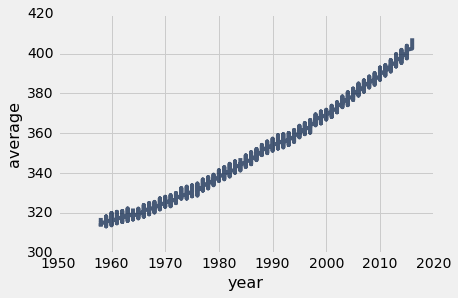

In [67]:
## Your First Plot!

NOAA_data.plot('year','average')

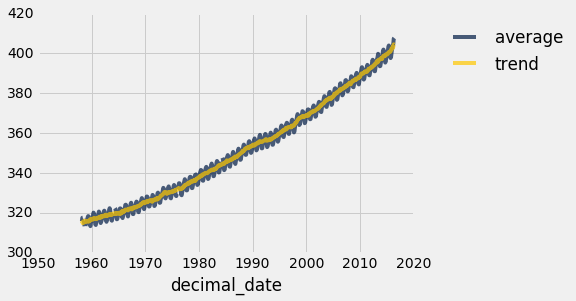

In [71]:
## This plot is slightly more complex, but as you can see it just plots average and trend relative to year by decimal date.

NOAA_data.plot('decimal_date', ['average', 'trend'], overlay = True )